# Описание проекта

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Перед нами стоит 2 задачи. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных**

Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Задача 1: предсказание уровня удовлетворённости сотрудника**

**План действий**
1. Загрузка данных.
2. Предобработка данных. Изучение данных и выводы. Предобработка.
3. Исследовательский анализ данных. Исследую все признаки и пойму как их нужно подготовить.
4. Подготовка данных. Подготовка признаков в пайплайне (дополнив пайплайн шага предобработки). 
5. Обучение моделей. Подобрать гиперпараметры как минимум для одной модели. Выбрать лучшую модель и проверить её качество. 
6. Общие выводы.

**Задача 2: предсказание увольнения сотрудника из компании**

Целевой признак отличается: это quit — увольнение сотрудника из компании.

**План действий**

1. Загрузка данных.
2. Предобработка данных. Изучение данных и выводы. Предобработка.
3.1. Исследовательский анализ данных.
3.2. Портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.
3.3. Проверьте утверждение, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников.
4. Добавление нового входного признака.
5. Подготовка данных в пайплайне.
6. Обучение модели. Обучить как минимум три модели. Проверить качество лучшей модели.
7. Общие выводы

# Задача 1

# Шаг 1. Загрузка данных

In [3]:
import warnings
warnings.filterwarnings('ignore')
#установка phik
! pip install phik -q

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from phik.report import plot_correlation_matrix

# пайплайн
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# метрики
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

In [5]:
train_1 = pd.read_csv('/datasets/train_job_satisfaction_rate.csv').set_index('id')
train_1.info()
train_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [6]:
X_test_1 = pd.read_csv('/datasets/test_features.csv').set_index('id')
X_test_1.info()
X_test_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [7]:
y_test_1 = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv').set_index('id')
y_test_1.info()
y_test_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


**Вывод**

Данные содержат пропуски, с которыми предстоит поработать.

# Шаг 2. Предобработка данных

**Датасет train_job_satisfaction_rate**

In [8]:
for i in train_1.select_dtypes(include='object').columns:
    display(i,train_1[i].value_counts())
#категориальные переменные не содержат каких-то ошибок внутри наименований

'dept'

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

'level'

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

'workload'

medium    2066
low       1200
high       734
Name: workload, dtype: int64

'last_year_promo'

no     3880
yes     120
Name: last_year_promo, dtype: int64

'last_year_violations'

no     3441
yes     559
Name: last_year_violations, dtype: int64

In [9]:
#посмотрю, с чем связаны пропуски в департаменте и уровне должности
train_1[train_1['dept'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
694746,NaN,junior,medium,5,no,no,4,21600,0.62
814624,NaN,junior,medium,3,no,no,4,24000,0.88
475114,NaN,junior,high,4,no,no,4,31200,0.63
497243,NaN,junior,medium,1,no,no,3,26400,0.28
168668,NaN,junior,low,3,no,no,4,18000,0.88
641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [10]:
train_1[train_1['level'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
631073,sales,NaN,medium,1,no,no,4,27600,0.66
416327,sales,NaN,low,1,no,no,5,18000,0.73
135043,sales,NaN,medium,1,no,no,3,26400,0.30
998838,sales,NaN,medium,1,no,no,5,27600,0.71


In [11]:
#посмотрю данные в количественных переменных
train_1.describe()

#каких-то ошибок в количественных данных на первый взгляд нет

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


**Датасет test_features**

In [12]:
for i in X_test_1.select_dtypes(include='object').columns:
    display(i,X_test_1[i].value_counts())
#категориальные переменные не содержат каких-то ошибок внутри наименований

'dept'

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

'level'

junior    974
middle    854
sinior    171
Name: level, dtype: int64

'workload'

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

'last_year_promo'

no     1937
yes      63
Name: last_year_promo, dtype: int64

'last_year_violations'

no     1738
yes     262
Name: last_year_violations, dtype: int64

In [13]:
#посмотрю, с чем связаны пропуски в департаменте и уровне должности
X_test_1[X_test_1['dept'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
609865,NaN,junior,medium,1,no,no,1,20400
832342,NaN,junior,medium,1,no,no,4,28800


In [14]:
X_test_1[X_test_1['level'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
471990,sales,NaN,low,1,no,no,3,12000


In [15]:
#посмотрю данные в количественных переменных
X_test_1.describe()

#каких-то ошибок в количественных данных на первый взгляд нет

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


**Датасет test_target_job_satisfaction_rate**

In [16]:
y_test_1.head()

,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


In [17]:
#для заполнения пропусков сделаю пайплайн
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создайте общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)    
    ], 
    remainder =  'passthrough')

# Шаг 3. Исследовательский анализ данных

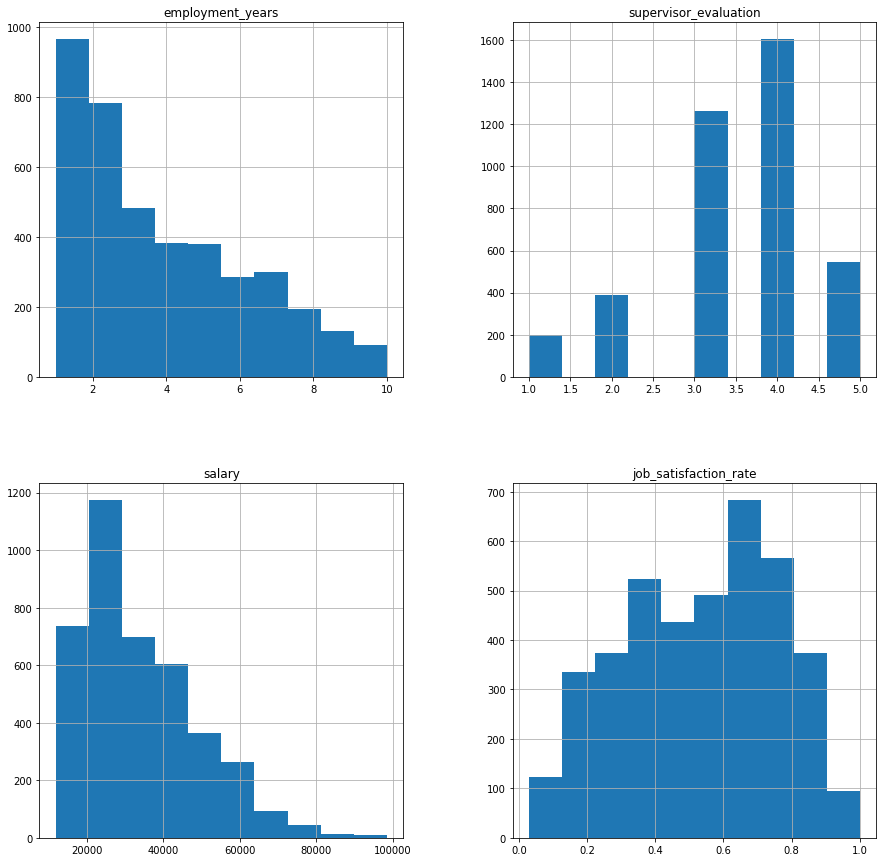

In [18]:
train_1.hist(figsize=(15,15));

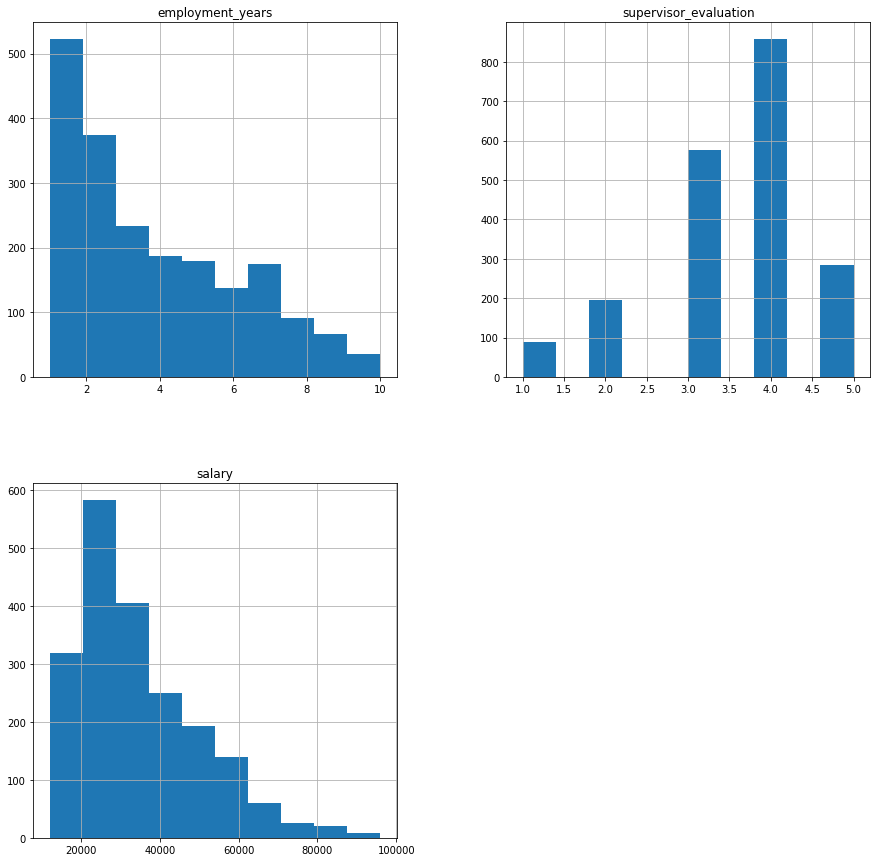

In [19]:
X_test_1.hist(figsize=(15,15));

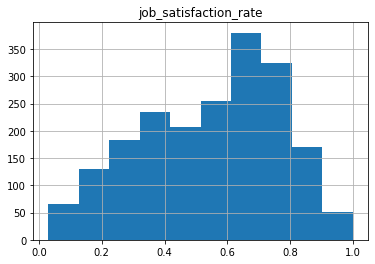

In [20]:
y_test_1.hist();

По распределению количества отработанных лет в компании все логично - чем ближе к 10 годам, тем меньше значений. <br>
Оценка руководителя в основном 3 и 4, пик в 4. <br>
Зарплата имеет пик в 30 тысяч рублей. Это касается тренировочных и тестовых данных. <br>
Наш целевой признак, в тренировочной выборке и в целевом датасете имеет два пика - 0.4 и 0.8.

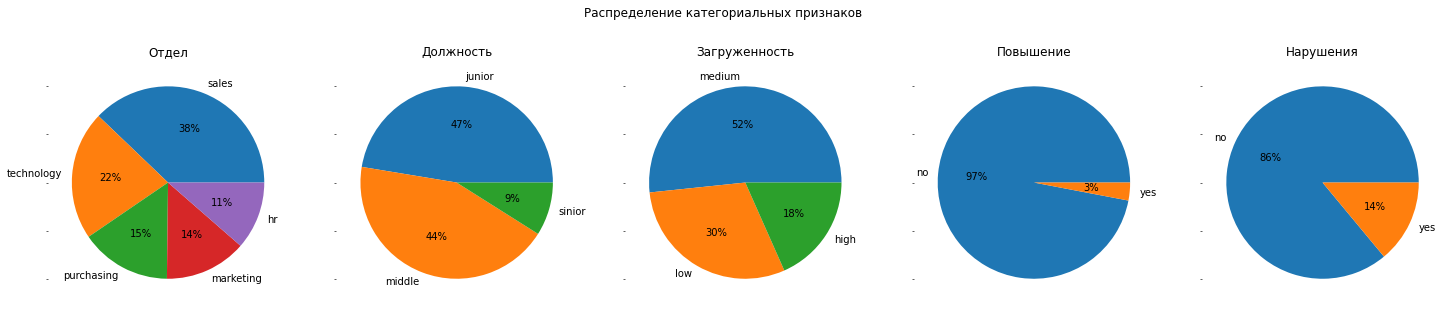

In [21]:
#круговые диаграммы для тренировочных данных
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(25,25));
fig.suptitle('Распределение категориальных признаков',y=0.6);
train_1['dept'].value_counts().plot(kind='pie',y='dept',ax=ax0,autopct='%1.0f%%',legend=None);
train_1['level'].value_counts().plot(kind='pie',y='level',ax=ax1,autopct='%1.0f%%',legend=None);
train_1['workload'].value_counts().plot(kind='pie',y='workload',ax=ax2,autopct='%1.0f%%',legend=None);
train_1['last_year_promo'].value_counts().plot(kind='pie',y='last_year_promo',ax=ax3,autopct='%1.0f%%',legend=None);
train_1['last_year_violations'].value_counts().plot(kind='pie',y='last_year_violations',ax=ax4,autopct='%1.0f%%',legend=None);

ax0.set(title='Отдел',ylabel='');
ax1.set(title='Должность');
ax2.set(title='Загруженность');
ax3.set(title='Повышение');
ax4.set(title='Нарушения');

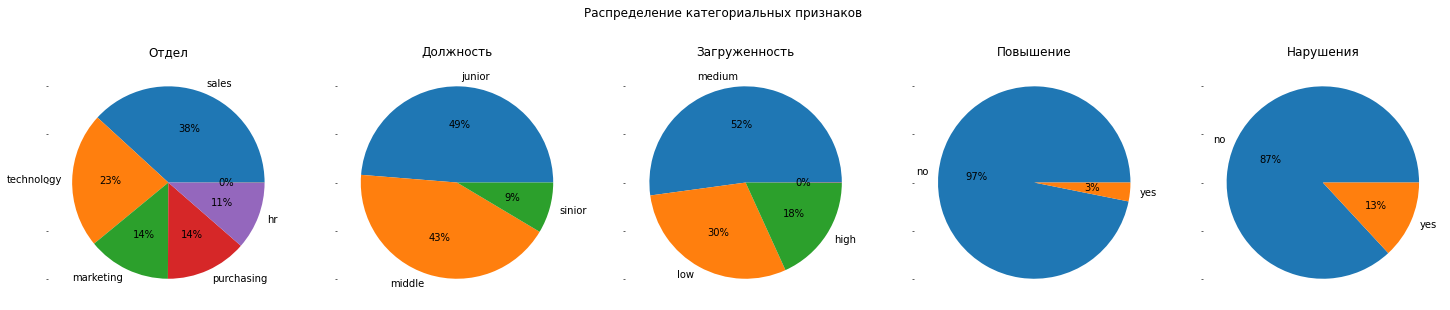

In [22]:
#круговые диаграммы для тестовых данных
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(25,25));
fig.suptitle('Распределение категориальных признаков',y=0.6);
X_test_1['dept'].value_counts().plot(kind='pie',y='dept',ax=ax0,autopct='%1.0f%%',legend=None);
X_test_1['level'].value_counts().plot(kind='pie',y='level',ax=ax1,autopct='%1.0f%%',legend=None);
X_test_1['workload'].value_counts().plot(kind='pie',y='workload',ax=ax2,autopct='%1.0f%%',legend=None);
X_test_1['last_year_promo'].value_counts().plot(kind='pie',y='last_year_promo',ax=ax3,autopct='%1.0f%%',legend=None);
X_test_1['last_year_violations'].value_counts().plot(kind='pie',y='last_year_violations',ax=ax4,autopct='%1.0f%%',legend=None);

ax0.set(title='Отдел',ylabel='');
ax1.set(title='Должность');
ax2.set(title='Загруженность');
ax3.set(title='Повышение');
ax4.set(title='Нарушения');

Распределение долей одинаковое в тренировочных и тестовых данных. В основном это:
- работники продающего подразделения или ИТ
- джуны или миддлы
- со средней загруженностью
- без повышени в последний год
- и в основном без нарушений

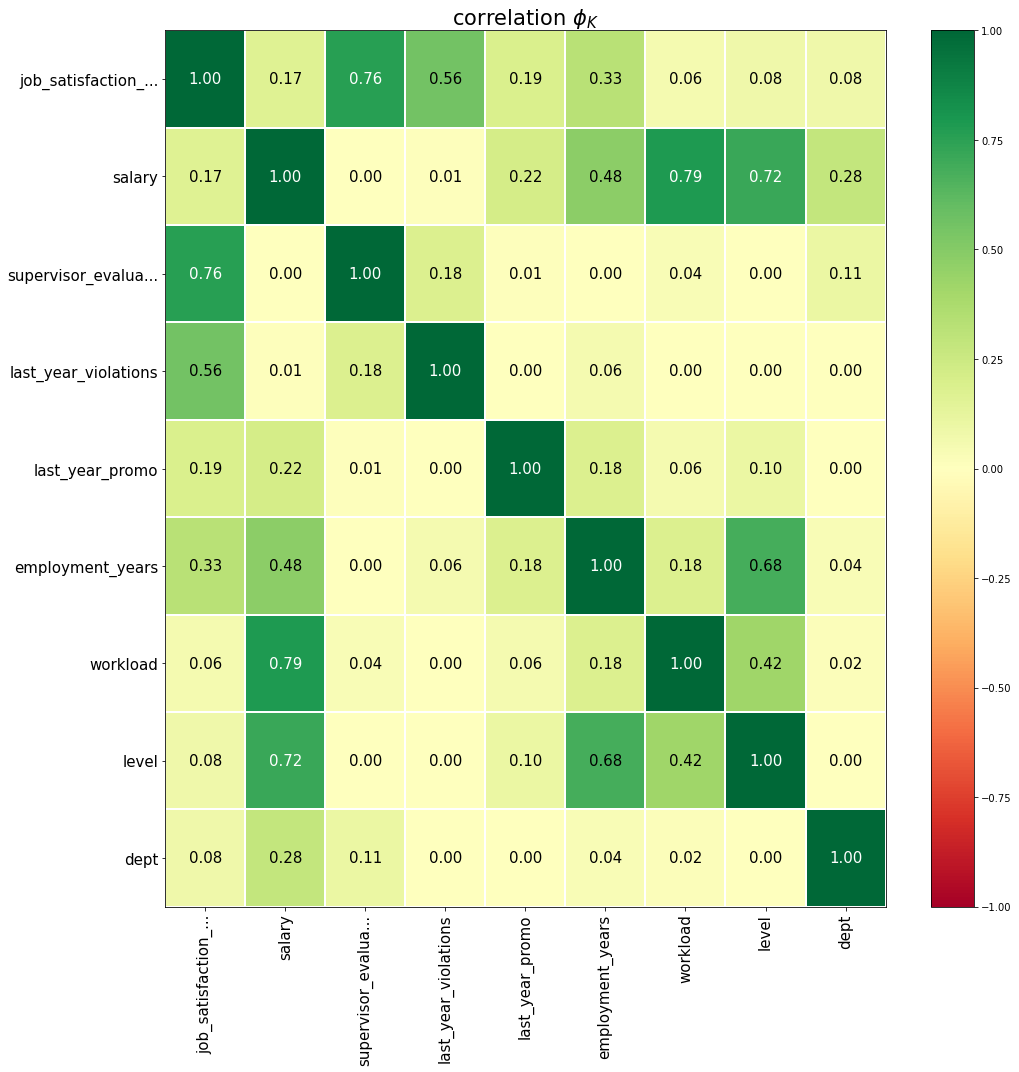

In [23]:
#для корреляционного анализа использую тепловую карту коэффициентов кореляции ф
interval_cols =['employment_years','supervisor_evaluation','salary','job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма 
phik_overview = train_1.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 15)
)

На целевой признак больше всего влияют показатели оценки руководителя, проступков за прошлый год и количество проведенных в компании лет.

При этом мультиколлинеарность наблюдается между такими показателями как:
- зарплата и загруженность, позиция
- количество лет в компании и позиция

**Вывод**

Что тренировочный датасет, что тестовый содержит хорошую информацию для дальнейшего анализа. 

# Шаг 4. Подготовка данных

In [24]:
#метрика SMAPE
def smape(y_true, y_pred):
    return 100*np.mean(2*np.abs(y_pred - y_true)/(np.abs(y_pred) + np.abs(y_true)))

def smape_scorer(y_true, y_pred):
    return smape(y_true, y_pred)

In [25]:
# создаём итоговый пайплайн: подготовка данных
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

# Шаг 5. Обучение моделей

In [26]:
RANDOM_STATE = 42

#для заполнения пропусков сделаю пайплайн
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создайте общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)    
    ], 
    remainder =  'passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None, 5, 10, 20,40],
        'models__min_samples_split': [2, 5, 10,20],
        'models__min_samples_leaf': [1, 2, 4,6]
    },
    {
        'models': [LinearRegression()],
        'models__normalize': [True, False]
        # Другие гиперпараметры модели LinearRegression
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=make_scorer(smape_scorer,greater_is_better=False),
    n_jobs=-1
)
columns_to_drop =['job_satisfaction_rate']
X_train_1 = train_1.drop(columns_to_drop,axis=1)
y_train_1 = train_1['job_satisfaction_rate']
#encoder = LabelEncoder()
#y_train_1 = encoder.fit_transform(y_train_1)

randomized_search.fit(X_train_1, y_train_1)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                              

In [27]:
#подготовлю тестовые данные - номера id идут не по порядку в тренировочной и тестовой выборке
y_test_1 = y_test_1.reset_index().sort_values(by='id')
y_test_1 = y_test_1.set_index('id')

y_test_1.head()

,job_satisfaction_rate
id,
100298,0.80
100480,0.84
100503,0.79
100610,0.75
100692,0.69


In [28]:
X_test_1 = X_test_1.reset_index().sort_values(by='id')

X_test_1 = X_test_1.set_index('id')
X_test_1.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200
100480,marketing,junior,low,4,no,no,4,16800
100503,purchasing,middle,high,5,no,no,4,55200
100610,sales,middle,medium,5,no,no,4,43200
100692,sales,middle,high,6,no,no,4,48000


In [29]:
X_test_1 = X_test_1.replace(' ', np.nan)
y_test_pred = randomized_search.best_estimator_.predict(X_test_1)
y_true = y_test_1['job_satisfaction_rate']

print('Метрика: ', smape_scorer(y_true, y_test_pred))

Метрика:  13.48819011890969


# Шаг 6. Оформление выводов

Job_satisfaction_rate представлен коэффициентом от 0 до 1. Из двух моделей - линейной регрессии и дерева решений случайный поиск выбрал дерево решений как лучшую модель.

Однако качество оставляет желать лучшего - на тренировочной выборке метрика равна 14.76, на тестовой даже лучше - 13.73.

# Задача 2: предсказание увольнения сотрудника из компании

# Шаг 1. Загрузка данных

In [30]:
train_2 = pd.read_csv('/datasets/train_quit.csv').set_index('id')
train_2.info()
train_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


In [31]:
y_test_2 = pd.read_csv('/datasets/test_target_quit.csv').set_index('id')
y_test_2.info()
y_test_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes


**Вывод**

Данные не содержат пропусков, типы данных тоже не надо исправлять.

# Шаг 2. Предобработка данных

In [32]:
for i in train_2.select_dtypes(include='object').columns:
    display(i,train_2[i].value_counts())
#категориальные переменные не содержат каких-то ошибок внутри наименований

'dept'

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

'level'

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64

'workload'

medium    2118
low       1208
high       674
Name: workload, dtype: int64

'last_year_promo'

no     3887
yes     113
Name: last_year_promo, dtype: int64

'last_year_violations'

no     3455
yes     545
Name: last_year_violations, dtype: int64

'quit'

no     2872
yes    1128
Name: quit, dtype: int64

In [33]:
y_test_2['quit'].value_counts()

no     1436
yes     564
Name: quit, dtype: int64

In [34]:
#для заполнения пропусков сделаю пайплайн
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создайте общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)    
    ], 
    remainder =  'passthrough')

# Шаг 3. Исследовательский анализ данных

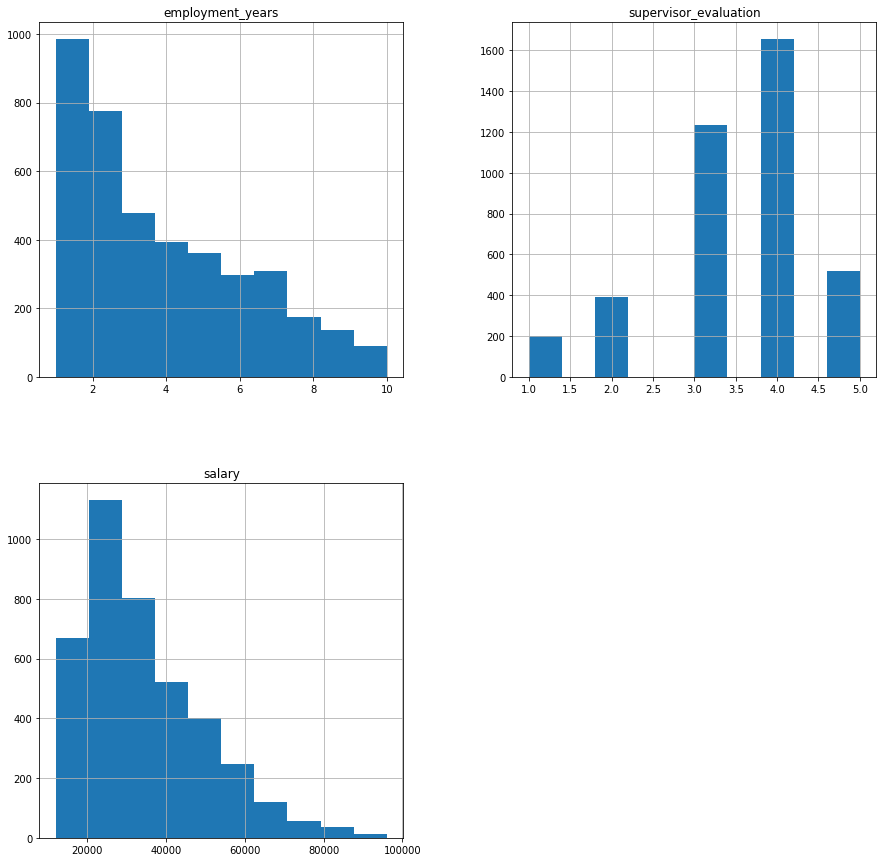

In [35]:
train_2.hist(figsize=(15,15));

In [36]:
train_2.describe()

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [37]:
train_2_pivot = train_2.pivot_table(index='dept',columns='quit',values=['level','salary'],
                    aggfunc={'level':'count','salary':'mean'}).sort_values([('level','yes')],ascending=False)

train_2_pivot['share_quit'] = train_2_pivot['level','yes'] / train_2_pivot['level','no'] * 100
train_2_pivot

level             salary               share_quit
quit          no  yes            no           yes           
dept                                                        
sales       1031  407  35278.370514  21832.923833  39.476237
technology   652  276  42003.680982  27686.956522  42.331288
purchasing   422  166  35840.758294  23378.313253  39.336493
marketing    419  163  39161.813842  24058.895706  38.902148
hr           348  116  37324.137931  22520.689655  33.333333

In [38]:
train_2.groupby('quit')['workload'].value_counts()

quit  workload
no    medium      1630
      low          689
      high         553
yes   low          519
      medium       488
      high         121
Name: workload, dtype: int64

Больше всего сотрудников уволилось из продаж. При этом средняя зарплата у них была в 1.5 раза ниже ныне работающих. <br>
В-целом, у уволившихся зарплата в среднем ниже. При этом и загруженность была не на высоте.

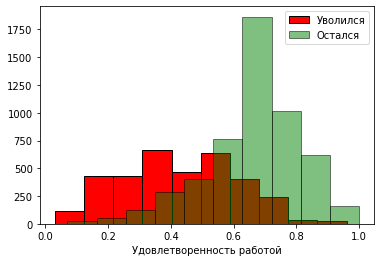

In [39]:
merge = train_1.merge(train_2,how='inner')

merge_quit = merge.query('quit == "yes"')
merge_stay = merge.query('quit == "no"')

plt.hist(merge_quit['job_satisfaction_rate'], edgecolor='black',color='red',bins=10,label='Уволился')
plt.hist(merge_stay['job_satisfaction_rate'], edgecolor='black',color='green',bins=10,label='Остался',alpha=0.5)
 
plt.legend(loc='upper right')
 
plt.xlabel('Удовлетворенность работой')
 
plt.show()

Распределение удовлетворенностью своей работой показывает, что уволившиеся сотрудники были меньше довольны своей работой. <br>
Причем, у уволившихся 2 пика - 0.3 и 0.5. У оставшихся пик в 0.7.

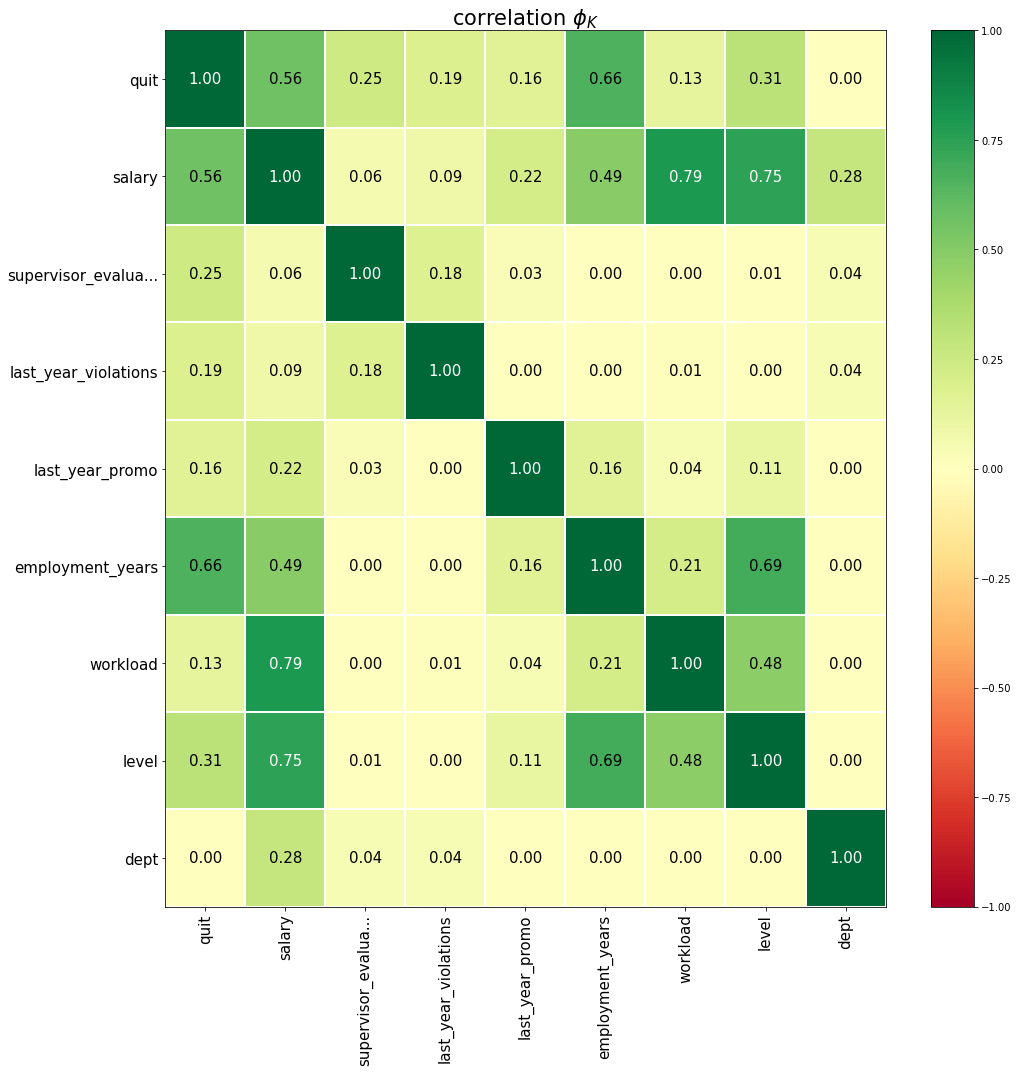

In [40]:
#для корреляционного анализа использую тепловую карту коэффициентов кореляции ф
interval_cols =['employment_years','supervisor_evaluation','salary','job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма 
phik_overview = train_2.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 15)
)

**Вывод**

Уволившиеся сотрудники получали в 1.5 раза меньше и не были удовлетворены своей работой.

Согласно матрице корреляции, зарплата и проведенное в компании время влияет на целевой признак.

# Шаг 4. Добавление нового входного признака

In [41]:
X_test_1['job_satisfaction_rate'] = y_test_pred.tolist()
X_test_1

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.837500
100480,marketing,junior,low,4,no,no,4,16800,0.852000
100503,purchasing,middle,high,5,no,no,4,55200,0.746667
100610,sales,middle,medium,5,no,no,4,43200,0.813333
100692,sales,middle,high,6,no,no,4,48000,0.693333
...,...,...,...,...,...,...,...,...,...
997290,sales,sinior,medium,7,no,no,4,58800,0.821250
998548,marketing,junior,medium,2,no,no,4,32400,0.793333
998762,technology,junior,low,3,no,no,3,22800,0.496667


# Шаг 5, 6. Подготовка данных и обучение модели

In [42]:
RANDOM_STATE = 42

#для заполнения пропусков сделаю пайплайн
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создайте общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)    
    ], 
    remainder =  'passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    # словарь для модели LogisticRegression() 
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

X_train_2 = train_2.drop('quit',axis=1)
y_train_2 = train_2['quit']
encoder = LabelEncoder()
#y_train_1 = encoder.fit_transform(y_train_1)

randomized_search.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                              

In [43]:
X_test_1.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.837500
100480,marketing,junior,low,4,no,no,4,16800,0.852000
100503,purchasing,middle,high,5,no,no,4,55200,0.746667
100610,sales,middle,medium,5,no,no,4,43200,0.813333
100692,sales,middle,high,6,no,no,4,48000,0.693333


In [44]:
y_test_2 = y_test_2.reset_index('id')
y_test_2 = y_test_2.sort_values(by='id')
y_test_2 = y_test_2.set_index('id')

y_test_2.head()

,quit
id,
100298,no
100480,no
100503,no
100610,no
100692,no


In [45]:
# проверю работу модели на тестовой выборке
# рассчитаю прогноз на тестовых данных
y_test_pred_2 = randomized_search.predict_proba(X_test_1.drop('job_satisfaction_rate',axis=1))[:,1]
encoder.fit(y_train_2)
y_true_2 = encoder.transform(y_test_2['quit'])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_true_2, y_test_pred_2)}')

Метрика ROC-AUC на тестовой выборке: 0.9111721883087378


# Шаг 7. Выводы

Лучшая модель согласно случайному подбору оказалась Метод k-ближайших соседей. Метрика на тренировочной выборке 0.92.

На тестовой немного хуже - 0.91.

# Общий вывод

На показатель удовлетворенности работой больше всего влияют показатели оценки руководителя, проступков за прошлый год и количество проведенных в компании лет.

Для предсказания уровня удовлетворенности работой подходит модель дерева решений. 

Уволившиеся сотрудники получали в 1.5 раза меньше и не были удовлетворены своей работой.

Доля уволившихся примерно одинаковая - 30-40%.

Их увольнение больше всего коррелирует с показателем зарплаты и проведенного в компании времени.

Для предсказания увольнения лучше всего себя показала модель k-ближайших соседей.

**Рекомендации для бизнеса**

- Доля уволившихся сотрудников достаточно высокая - о 30% до 40%. Компании стоит обратить внимание на этот показатель.
- Можно обратить внимание на размер оплаты труда - у уволившихся зарплата была в 1.5 раза ниже ныне работающих.
- Так же можно поговорить с недоволльными работниками и предложить им новые проекты/функции. Уволившиеся сотрудники в основном имели низкую загрузку.
- Так же можно предложить обычные для таких случаев мероприятия - предложение новых нематериальных бонусов сотрудникам. Например обучение или скидки у партнеров. Это как раз может компенсировать две проблемы - оплаты труда и загрузки.